In [1]:
from keras.models import Model
from tensorflow.keras.layers import Input
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose, UpSampling2D, ZeroPadding2D
from keras.layers import LeakyReLU, ReLU, PReLU
from keras.layers import Activation
from keras.layers import Concatenate, Add, Multiply
from keras.layers import Dropout, AveragePooling2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.layers import BatchNormalization
import tensorflow as tf
from numpy import asarray, vstack
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import linear, tanh

import os
import fnmatch
import numpy as np
import random
import matplotlib.pyplot as plt


from os import listdir
from numpy import asarray, vstack
from keras.models import load_model
from numpy.random import randint
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from matplotlib import pyplot
import numpy as np
import random

In [2]:
def load_image(path1, size=(280,400)):
    i = 0
    src_list = list()
    for img in listdir(path1):
        if i < 3000:
#             print(img)
            pixels1 = load_img(path1 + img, target_size=size)
            pixels1 = img_to_array(pixels1)
            src_list.append(pixels1)
            i = i+1
        
    return asarray(src_list)

path1 = 'archive/Dataset/images/'
X = load_image(path1)

print(X.shape)

(3000, 280, 400, 3)


In [4]:
File_data = np.loadtxt('archive/Dataset/SteerValues/steer_values.txt', dtype=float)
y = File_data[:3000]
for i in y:
    if i > 0:
        print(i)

0.0016234726645052433
0.004178800620138645
0.006573832593858242
0.020388931035995483
0.05266948044300079
0.09845584630966187
0.15703243017196655
0.21870151162147522
0.28789734840393066
0.31243303418159485
0.3564627766609192
0.3742963671684265
0.3790881633758545
0.3943110406398773
0.36950382590293884
0.3786929249763489
0.38321223855018616
0.37410834431648254
0.3691583275794983
0.3728930354118347
0.3829510807991028
0.36970439553260803
0.3437964916229248
0.34818780422210693
0.29726243019104004
0.3160009980201721
0.2937391698360443
0.27274173498153687
0.23891863226890564
0.2483285367488861
0.2406129091978073
0.2285231351852417
0.19666120409965515
0.20763735473155975
0.171012282371521
0.0564723014831543
0.07377094030380249
0.014428898692131042
0.0137709379196167
0.0016735009849071503
2.05114483833313e-05
0.0034839995205402374
0.002504143863916397
0.003615517169237137
0.01004699245095253
0.006029106676578522
0.010327167809009552
0.01219256967306137
0.013187017291784286
0.014301475137472153
0

In [5]:
print(y.shape)

y = y.reshape(-1,1)

y = np.float32(y)
X = np.float32(X)
print(y.shape)
print(y)
y = np.interp(y, (y.min(), y.max()), (-1, +1))
for i in y:
    if i > 0:
        print(i)

(3000,)
(3000, 1)
[[-0.00308012]
 [-0.0039167 ]
 [-0.00231065]
 ...
 [-0.00299301]
 [-0.00353668]
 [-0.0040468 ]]
[0.06473944]
[0.20220391]
[0.35644602]
[0.41113769]
[0.5092829]
[0.54903516]
[0.55971639]
[0.59364919]
[0.53835226]
[0.55883537]
[0.56890922]
[0.54861604]
[0.53758213]
[0.54590704]
[0.56832709]
[0.53879935]
[0.48104891]
[0.49083744]
[0.37732141]
[0.41909092]
[0.36946783]
[0.32266315]
[0.24726921]
[0.26824452]
[0.25104587]
[0.22409696]
[0.15307461]
[0.17754117]
[0.09590146]
[0.23290045]
[0.16354894]
[0.30729645]
[0.41443222]
[0.48870194]
[0.5047188]
[0.57296712]
[0.54799119]
[0.5880081]
[0.62621198]
[0.60655301]
[0.62840401]
[0.58699722]
[0.6399254]
[0.66177687]
[0.66868599]
[0.59571474]
[0.54581855]
[0.50032689]
[0.42371733]
[0.35735068]
[0.26023881]
[0.28166312]
[0.2552526]
[0.23719862]
[0.23292047]
[0.20719231]
[0.14086044]
[0.16923726]
[0.13179877]
[0.2899212]
[0.40743985]
[0.48609378]
[0.58019425]
[0.61452265]
[0.72668136]
[0.71869139]
[0.80666285]
[0.82572931]
[0.87546

In [6]:
from tensorflow import keras
path = 'road_seg_model_v2.h5'

model = keras.models.load_model(path)

print("Model Loaded")

print(X.shape)

predict_images = model.predict(X)

print(predict_images.shape)

Model Loaded
(3000, 280, 400, 3)
94/94 [==============================] - 93s 979ms/step
(3000, 280, 400, 1)


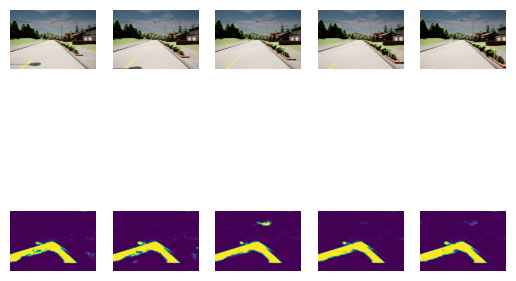

In [7]:
n_samples = 5
idx = 280

for i in range(n_samples):
    pyplot.subplot(2, n_samples, 1 + i)
    pyplot.axis('off')
    pyplot.imshow(X[i + idx].astype('uint8'))
    
# plot target image
for i in range(n_samples):
    pyplot.subplot(2, n_samples, 1 + n_samples + i)
    pyplot.axis('off')
    pyplot.imshow(predict_images[i + idx])

In [8]:
import cv2

segment_mask = []

for img in predict_images:
    segment_mask.append(cv2.resize(img, (220, 110)))

(3000, 110, 220, 1)


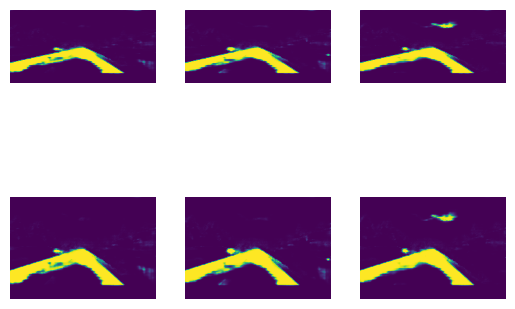

In [7]:
segment_mask = np.reshape(segment_mask, (-1, 110, 220, 1))
segment_mask = np.array(segment_mask)

print(segment_mask.shape)
n_samples = 3
idx = 280

for i in range(n_samples):
    pyplot.subplot(2, n_samples, 1 + i)
    pyplot.axis('off')
    pyplot.imshow(segment_mask[i + idx])
    
# plot target image
for i in range(n_samples):
    pyplot.subplot(2, n_samples, 1 + n_samples + i)
    pyplot.axis('off')
    pyplot.imshow(predict_images[i + idx])

for i in range(y.shape[0]):
    if i > 0:
        print(y[i_idx])

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(segment_mask, y, test_size=0.15, random_state=4)


from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=4)

print(X_train.shape)
print(X_val.shape)

print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(2167, 110, 220, 1)
(383, 110, 220, 1)
(450, 110, 220, 1)
(2167, 1)
(383, 1)
(450, 1)


In [9]:
print(y_train[0].dtype)

float64


[0.06473944]
[0.20220391]
[0.35644602]


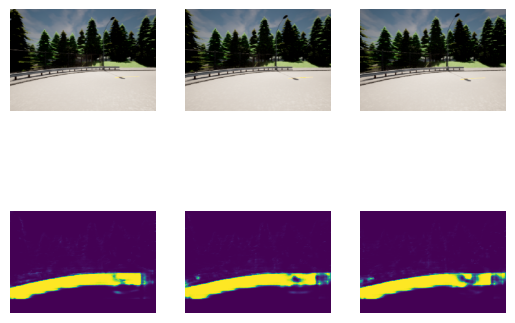

In [13]:
n_samples = 3
idx = 9

for i in range(n_samples):
    pyplot.subplot(2, n_samples, 1 + i)
    pyplot.axis('off')
    pyplot.imshow(X[i + idx].astype('uint8'))
    
# plot target image
for i in range(n_samples):
    pyplot.subplot(2, n_samples, 1 + n_samples + i)
    pyplot.axis('off')
    pyplot.imshow(predict_images[i + idx])
    
    
for i in range(n_samples):
    if y[i+idx] > 0:
        print(y[i + idx])

In [11]:
def SegNet(image_shape=(110,220,1)):
    
    in_image = Input(shape=image_shape)
    
    layer1_conv = Conv2D(64, (3,3), padding='valid')(in_image)
    layer1_relu = ReLU()(layer1_conv)
    
    maxpool_1 = MaxPooling2D(pool_size=(2, 2), strides=(2,2))(layer1_relu)
    
    
    
    
    
    layer2_conv = Conv2D(32, (3,3), padding='valid')(maxpool_1)
    layer2_relu = ReLU()(layer2_conv)
    
    maxpool_2 = MaxPooling2D(pool_size=(2, 2), strides=(2,2))(layer2_relu)
    
    
    
    
    
    layer3_conv = Conv2D(32, (3,3), padding='valid')(maxpool_2)
    layer3_relu = ReLU()(layer3_conv)
    
    maxpool_3 = MaxPooling2D(pool_size=(2, 2), strides=(2,2))(layer3_relu)
    
    
    
    
    
    
    
    layer4_conv = Conv2D(32, (3,3), padding='valid')(maxpool_3)
    layer4_relu = ReLU()(layer4_conv)
    
    maxpool_4 = MaxPooling2D(pool_size=(2, 2), strides=(2,2))(layer4_relu)
    
    flatten = Flatten()(maxpool_4)
    
    
    dense_1 = Dense(128)(flatten)
    dense_1 = tanh(dense_1)
    
    dense_2 = Dense(1)(dense_1)
    output = tanh(dense_2)
    
    
    
    
    
    
    model = Model(in_image, output)
    
    return model

model = SegNet()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 110, 220, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 108, 218, 64)      640       
                                                                 
 re_lu (ReLU)                (None, 108, 218, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 54, 109, 64)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 52, 107, 32)       18464     
                                                                 
 re_lu_1 (ReLU)              (None, 52, 107, 32)       0         
                                                             

In [12]:
opt = Adam(learning_rate=1e-6)

model.compile(optimizer=opt, loss=['mae'])

In [13]:
model_history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=60, batch_size=16)
model.save('edp.h5')

Epoch 1/60
136/136 [==============================] - 28s 199ms/step - loss: 0.2918 - val_loss: 0.2615
Epoch 2/60
136/136 [==============================] - 25s 185ms/step - loss: 0.2234 - val_loss: 0.1940
Epoch 3/60
136/136 [==============================] - 25s 185ms/step - loss: 0.1489 - val_loss: 0.1242
Epoch 4/60
136/136 [==============================] - 25s 183ms/step - loss: 0.1000 - val_loss: 0.1070
Epoch 5/60
136/136 [==============================] - 25s 182ms/step - loss: 0.0948 - val_loss: 0.1050
Epoch 6/60
136/136 [==============================] - 25s 181ms/step - loss: 0.0929 - val_loss: 0.1035
Epoch 7/60
136/136 [==============================] - 25s 181ms/step - loss: 0.0912 - val_loss: 0.1022
Epoch 8/60
136/136 [==============================] - 25s 182ms/step - loss: 0.0899 - val_loss: 0.1011
Epoch 9/60
136/136 [==============================] - 25s 182ms/step - loss: 0.0887 - val_loss: 0.1002
Epoch 10/60
136/136 [==============================] - 25s 182ms/step - l

In [14]:
model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)

15/15 [==============================] - 1s 74ms/step


In [15]:
print(y_pred[1])
print(y_test[1])
for i in range(y_pred.shape[0])
    if y[i] > 0:
        print(y[i])

[-0.27898467]
[-0.29864933]


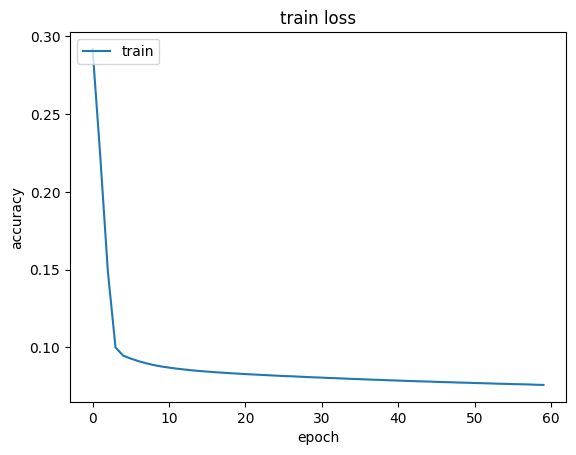

In [16]:
plt.plot(model_history.history['loss'])
plt.title('train loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

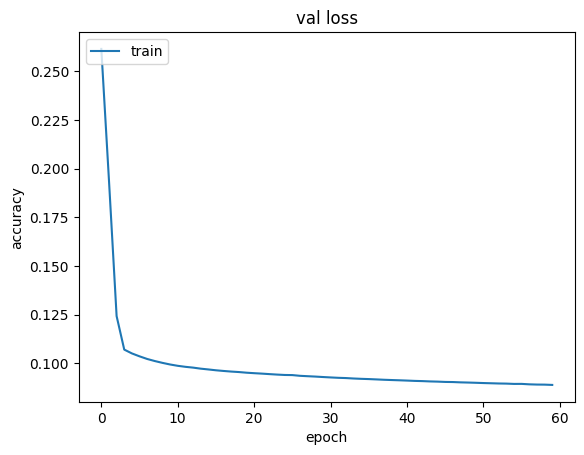

In [17]:
plt.plot(model_history.history['val_loss'])
plt.title('val loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()